In [2]:
import pandas as pd
import joblib

%pylab inline

import sys
sys.path.insert(0, '../Script/library3/')
from data_clean_save import *
from utilities import *


Populating the interactive namespace from numpy and matplotlib


In [3]:
for title1 in title_list_plot:
    print (title1)
    if 'part1' in title1:
        df2 = get_df_connected_from_raw('DNC_Mail',large_part=False,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    elif 'part2' in title1: 
        df2 = get_df_connected_from_raw('DNC_Mail',large_part=True,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    else: df2 = get_df_connected_from_raw(title1, remove_outlier=True)[['start','stop','timestamp','nodes']]
    assert (get_df(title1).sort_values(['timestamp','nodes']).values == df2.sort_values(['timestamp','nodes']).values).all()

DNC_Mail_part2
1461283200.0
1629 1598
ME
CollegeMsg
EU
sg_infectious_contact


../Script/library3/data_clean_save.py:80: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  df_list[i] = pd.read_table(x, header=-1)


primaryschool
highschool_2012
highschool_2013
ht09_contact
SFHH
tij_lnVS


../Script/library3/data_clean_save.py:105: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  comm = pd.read_table(path + 'Data/raw_data/metadata_InVS13.txt', header=-1)


tij_lnVS2
Hospital


### Fundamental Routines for data preprocessing

### Extract network data from raw data

In [4]:
for title1 in ['tij_lnVS']:
    print title1
    if 'mit' in title1: continue
    if 'part1' in title1:
        df1 = get_df_connected_from_raw('DNC_Mail',large_part=False,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    elif 'part2' in title1: df1 = get_df_connected_from_raw('DNC_Mail',large_part=True,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    else: df1 = get_df_connected_from_raw(title1)[['start','stop','timestamp','nodes']]
    print title1
    g1,L = from_df_to_graphs(df1)
    total_dic = from_graph_to_distance(g1)
    line_graph_distance_voc = from_line_graph_to_distance(g1,total_dic)
#     joblib.dump(g1,'../Data/preprocessed/'+title1+'/'+title1+'_graph.joblib')
#     joblib.dump(L,'../Data/preprocessed/'+title1+'/'+title1+'_line_graph.joblib')
#     joblib.dump(total_dic,'../Data/preprocessed/'+title1+'/'+title1+'_graph_distance_dic.joblib')
#     joblib.dump(line_graph_distance_voc,'../Data/preprocessed/'+title1+'/'+title1+'_line_graph_distance_voc.joblib')
    assert line_graph_distance_voc == get_distance_line_voc(title1)

tij_lnVS
tij_lnVS
('First consistency check:', True)
('Second consistency check:', True)


### Show effect of data preprocessing on global activity and inter-event times distribution

DNC_Mail_part2
1461283200.0
1629 1598
30091 30091


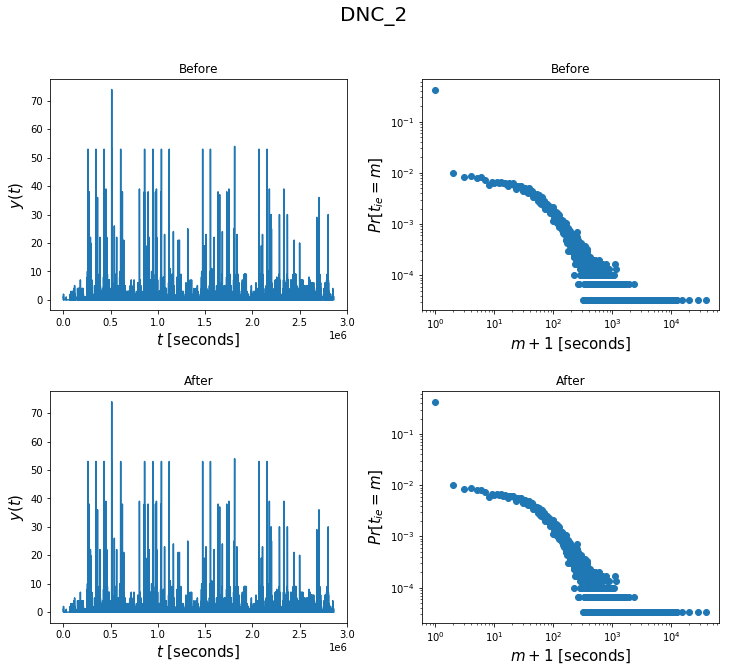

ME
82281 82281


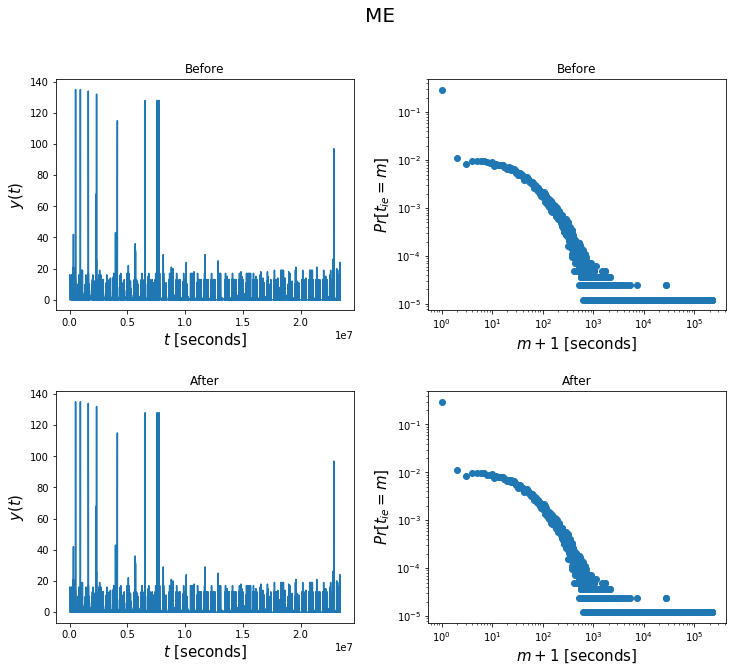

CollegeMsg
59789 59789


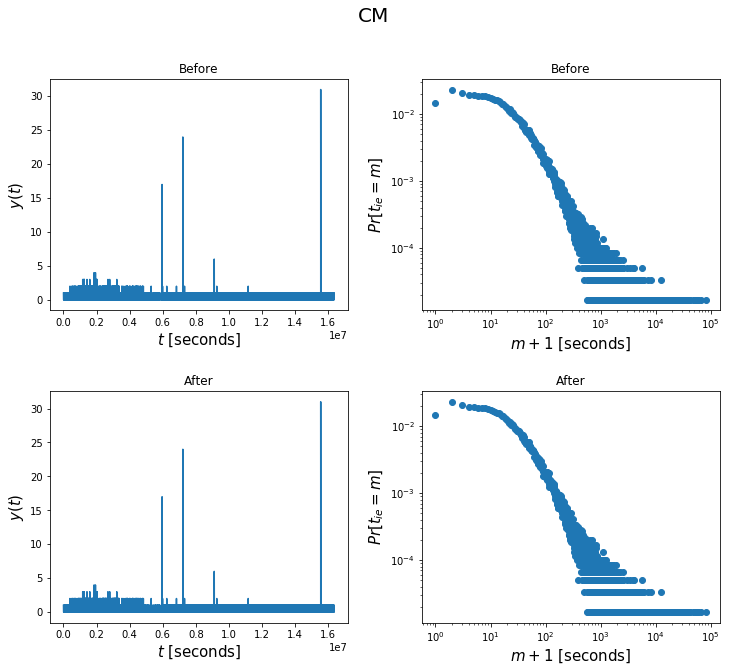

EU
324933 324933


In [ ]:
for title1 in title_list_plot:
    if title1=='mit': continue
    print title1
    if 'part1' in title1:
        df = get_df_connected_from_raw('DNC_Mail',large_part=False,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    elif 'part2' in title1: df = get_df_connected_from_raw('DNC_Mail',large_part=True,t_0='2016-04-22')[['start','stop','timestamp','nodes']]
    else: df = get_df_connected_from_raw(title1,remove_outlier = False)
    
    df1 = get_df(title1)    
    
    
    print df.shape[0],df1.shape[0]
        
    

    shift = [x.timestamp.shift(-1) - x.timestamp for x in [df,df1]]
    cnt = [Counter((x.timestamp.shift(-1) - x.timestamp)[:-1]) for x in [df,df1]]
    cnt = [pd.Series(index = x.keys(),data = x.values()) for x in cnt]
    dt = int(get_dt(df))
    max1,max2 =   max(df.timestamp),max(df1.timestamp)
    
    df.timestamp = df.timestamp.apply(lambda x:pd.to_datetime(x,unit = 's'))
    df1.timestamp = df1.timestamp.apply(lambda x:pd.to_datetime(x,unit = 's'))

    ts = df.groupby(df.timestamp).size().resample(str(dt)+'s').sum().fillna(0)
    ts1 = df1.groupby(df1.timestamp).size().resample(str(dt)+'s').sum().fillna(0)

    fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize = (12,10))
    fig.subplots_adjust(wspace=0.25)
    fig.subplots_adjust(hspace=0.35)
    assert  max1 ==(ts.shape[0]-1)*dt
    assert  max2 == (ts1.shape[0]-1)*dt
    assert df.shape[0]==ts.sum()
    assert df1.shape[0] == ts1.sum()
    ax1.plot(np.arange(0,ts.shape[0]*dt,dt),ts.values)
    
    ax1.ticklabel_format(style='sci',scilimits=(-3,4),axis='x')
    ax1.set_xlabel('$t$ [seconds]',size =15)
    ax1.set_ylabel('$y(t)$',size = 15)
    ax1.set_title('Before')
    ax2.set_xlabel(r'$m+1$ [seconds]',size = 15)
    ax2.set_ylabel(r'$Pr[t_{ie} = m]$',size = 15)
    ax2.plot(cnt[0].index+1,cnt[0].values/float(cnt[0].values.sum()),marker = 'o',linestyle = '')
    ax2.set_title('Before')
    ax2.loglog()
    ax3.plot(np.arange(0,ts1.shape[0]*dt,dt),ts1.values)
    ax3.ticklabel_format(style='sci',scilimits=(-3,4),axis='x')
    ax3.set_xlabel('$t$ [seconds]',size =15)
    ax3.set_ylabel('$y(t)$',size = 15)
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_title('After')
    ax4.set_xlabel(r'$m+1$ [seconds]',size = 15)
    ax4.set_ylabel(r'$Pr[t_{ie} = m]$',size = 15)
    ax4.set_xlim(ax2.get_xlim())
    ax4.set_ylim(ax2.get_ylim())
    ax4.set_title('After')
    ax4.plot(cnt[1].index+1,cnt[1].values/float(cnt[1].values.sum()),marker = 'o',linestyle = '')
    ax4.loglog()
    fig.suptitle(title_to_paper_name[title1],size = 20)
#     plt.savefig('../Results/Plots/preproc/'+title1+'_activity_preproc.eps',format = 'eps',box_inches = 'tight')
    plt.show()

### Print Table 1

In [6]:
extended_name= ['DNC Mail Part 2','Manufacturing Email','College Messages','Email EU','Infectious','Primary School','High School 2012','High School 2013', 'Hypertext 2009', 'SFHH Conference','Workplace 2013','Workplace 2015','Hospital']
extended_name = {k:v for k,v in zip(title_list_plot,extended_name)}

for title1 in title_list_plot:
    
    data_list = range(8)
    df = get_df(title1)
    dt = get_dt(df)
    g = get_graph(title1)
    if title1 == 'haggle': data_list[0] = title_to_paper_name[title1]
    else:
        data_list[0] = extended_name[title1] +' ('+title_to_paper_name[title1]+')'
        #if title1 in new_datasets:
        #    data_list[0] = extended_name[title1] +', new ('+title_to_paper_name[title1]+')'
    nodes = len(set(df.start)|set(df.stop))
    data_list[1] = nodes
    links = df.nodes.unique().shape[0]
    data_list[2] = links
    timestamp = df.timestamp.unique().shape[0]
    data_list[3] = timestamp
    events = df.shape[0]
    data_list[4] = events
    timespan = int((max(df.timestamp)-min(df.timestamp))/(dt))
    data_list[5] = timespan
    
    data_list[6] = int(dt)
    if title1 in mail_list: 
        type1 = 'virtual'
        
    elif title1 in human_contact_list: type1 = 'physical'
    data_list[7] = type1
    for i in range(len(data_list)):
        if i==7: 
            print '\\textit{'+data_list[i]+'}      ','\\\\','\n'
            break
            
        print data_list[i], str('    &   '),
          
    print ''
        

DNC Mail Part 2 (DNC_2)     &    1598     &    4085     &    17300     &    30091     &    2861358     &    1     &    \textit{virtual}       \\ 


Manufacturing Email (ME)     &    167     &    3250     &    57791     &    82281     &    23430482     &    1     &    \textit{virtual}       \\ 


College Messages (CM)     &    1892     &    13833     &    58905     &    59789     &    16362751     &    1     &    \textit{virtual}       \\ 


Email EU (EEU)     &    986     &    16025     &    206311     &    324933     &    44719809     &    1     &    \textit{virtual}       \\ 


Infectious (PS)     &    242     &    8317     &    3099     &    125771     &    3098     &    20     &    \textit{physical}       \\ 


Primary School (HS2013)     &    327     &    5818     &    7371     &    188504     &    7370     &    20     &    \textit{physical}       \\ 


High School 2012 (HT2009)     &    113     &    2196     &    5243     &    20818     &    7226     &    20     &    \textit{phys

## Plot Figure 1

/Users/albertoceria/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
../Script/library3/data_clean_save.py:140: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  comm = pd.read_table(path+'Data/raw_data/metadata_InVS13.txt',header=-1)



connected: 92, 92
4664    222680.0
9117     54840.0
5640     53140.0
1157     51820.0
2210     51080.0
3993     50360.0
3048     50060.0
6742     48400.0
7821     48360.0
Name: timestamp, dtype: float64
3


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/albertoceria/anaconda/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/albertoceria/anaconda/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2

connected: 1899, 1893
1    258552.0
Name: timestamp, dtype: float64
22
3


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


91


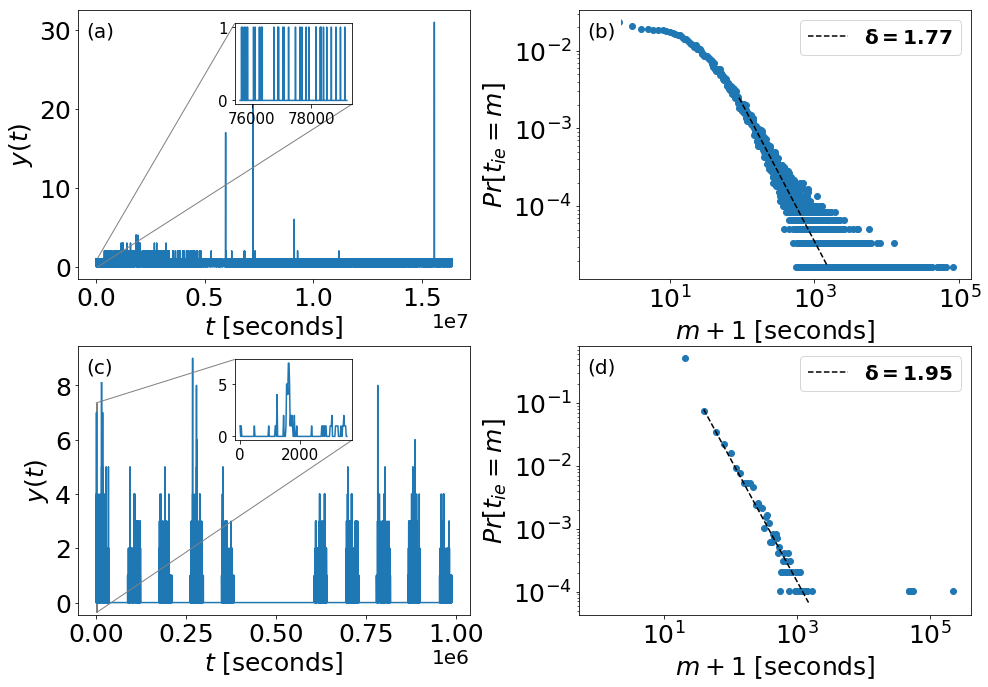

In [4]:
from scipy.special import zeta

from powerlaw import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                 mark_inset)





fig, ax_list = plt.subplots(ncols=2, nrows= 2,figsize=(16,12))

for i,title1 in enumerate(['tij_lnVS','CollegeMsg']):



    if title1 == 'CollegeMsg':
        df = get_df_connected_from_raw(title1,remove_outlier=False)
    if title1 == 'tij_lnVS':
        df = get_df_connected_from_raw(title1,remove_outlier=False)
    shift = df.timestamp.shift(-1) - df.timestamp
    cnt = Counter((df.timestamp.shift(-1) - df.timestamp)[:-1])
    dt = int(get_dt(df))
    df.timestamp = df.timestamp.apply(lambda x:pd.to_datetime(x,unit = 's'))
    ts = df.groupby(df.timestamp).size().resample(str(dt)+'s').sum().fillna(0)

    cnt3 = cnt.copy()



    if title1 == 'CollegeMsg':
        a = pd.to_datetime('1970-01-14 21:00:00')
        b = pd.to_datetime('1970-01-14 21:59:59')

    elif title1 == 'tij_lnVS':
        a = pd.to_datetime('1970-01-01 00:00:00')
        b = pd.to_datetime('1970-01-01 00:59:59')

    c = (a- pd.to_datetime('1970-01-01 00:00:00')).seconds/dt
    ts1 = ts[a:b]

    if title1 == 'CollegeMsg': [ax1,ax2] = ax_list[0]
    else:[ax1,ax2] = ax_list[1]
    if title1 == 'CollegeMsg':
        ax1.annotate('(a)', xy=(0.02, 0.9), xycoords="axes fraction",fontsize = 20,backgroundcolor='1')
        ax2.annotate('(b)', xy=(0.02, 0.9), xycoords="axes fraction",fontsize = 20,backgroundcolor='1')
    else:
        ax1.annotate('(c)', xy=(0.02, 0.9), xycoords="axes fraction",fontsize = 20,backgroundcolor='1')
        ax2.annotate('(d)', xy=(0.02, 0.9), xycoords="axes fraction",fontsize = 20,backgroundcolor='1')
        

    fig.subplots_adjust(wspace = 0.28,bottom = 0.18,hspace = 0.25)
    ax1.plot(np.arange(0,ts.shape[0]*dt,dt),ts.values)
    ax1.ticklabel_format(style='sci',scilimits=(-3,4),axis='x')
    ax1.set_xlabel('$t$ [seconds]',size =25)
    ax1.set_ylabel('$y(t)$',size = 25)
    ax1.tick_params(axis='x', labelsize=25)
    ax1.tick_params(axis='y', labelsize=25)
    ax1.xaxis.offsetText.set_fontsize(20)



    axr = plt.axes([c,0,c+3600,max(ts1)])
    axr.tick_params(axis='x', labelsize=15)
    axr.tick_params(axis='y', labelsize=15)
    # # Manually set the position and relative size of the inset axes within ax1
    ip = InsetPosition(ax1, [0.40,0.65,0.3,0.3])
    axr.set_axes_locator(ip)
    # # Mark the region corresponding to the inset axes on ax1 and draw lines
    # # in grey linking the two axes.
    mark_inset(ax1, axr, loc1=2, loc2=4, fc="none", ec='0.5')

    axr.plot(np.arange(c,c+3600,dt),ts1.values)

    cnt1 = pd.Series(index = cnt.keys(),data = cnt.values()).sort_index()
    ax2.set_xlabel(r'$m+1$ [seconds]',size = 25)
    ax2.set_ylabel(r'$Pr[t_{ie} = m]$',size = 25)

    #ax2.plot(cnt1.index+1,cnt1.values/float(cnt1.values.sum()),marker = 'o',linestyle = '',label = '__nolabel__')
    cnt1.index = cnt1.index+1
    cnt1 = cnt1/sum(cnt1)
    cnt2 = cnt1.copy()
    
    list1 = [i for a, b in cnt3.items() for i in [a]*b]
    list1 = np.array(list1)
    list1 = list1/dt
    fit1 = Fit(list1,discrete=True, discrete_approximation=False,sigma_threshold=1e-1)
    alpha, xmin = fit1.alpha, fit1.xmin
    xmin = int(xmin)
    print xmin

    cf = map(lambda X:pow(X,-alpha)/(float(zeta(alpha)) - sum(map(lambda Y:pow(Y,-alpha),range(1,xmin)))),range(int(xmin),int(max(cnt3.keys())/dt)+1))
    x = np.arange(xmin,int(max(cnt3.keys())/dt+1))
    y = np.array(cf)

    #y = y/sum(y) 
    y = y*sum(cnt1[cnt1.index/dt>=xmin])
    #print sum(y), sum(cnt1[cnt1.index>=xmin])
    d_comp = fit1.distribution_compare('power_law','exponential')
    #cnt1 = cnt1[cnt1.index/20>=xmin]

    ax2.plot(cnt1.index,cnt1.values,marker = 'o',linestyle = '',label = '__nolabel__')

    y = y[x<=1500/dt]
    x= x[x<=1500/dt]*dt

    if (d_comp[0] > 0) &(d_comp[1] < 5e-2):

        ax2.plot(x,y,linestyle = '--' ,label = r'$\bf{\delta = '+ str(round(fit1.alpha,2))+ '}$',color = 'k')
    else:ax_list.flatten()[plot_index].plot(x,y,linestyle = '--' ,label = r'$\delta$ = '+ str(round(fit1.alpha,2)))

    
    ax2.loglog() 
    ax2.tick_params(axis='x', labelsize=25)
    ax2.tick_params(axis='y', labelsize=25)

    ax2.legend(fontsize = 20)
plt.savefig('../Results/Plots/preproc/fig1.eps',format = 'eps',box_inches = 'tight')